# Lab 1: Data Analysis with HTRU2 Dataset

**Author:** Linda Jin [Leo Quintana]

**Course:** Physics 434 - Data Analysis Lab  
**Objective:** Learn statistical analysis, probability calculations, and data visualization using real pulsar survey data.

## Overview

In this laboratory, we will:
1. Set up git & GitHub for version control
2. Analyze pulsar candidates from the High Time Resolution Universe Survey (HTRU2) dataset
3. Practice statistical analysis and probability calculations
4. Create data visualizations and interpret results

**Key Learning Outcomes:**
- Understanding of statistical distributions
- Bayes' theorem application
- Data visualization with histograms
- Probability calculations with real data

## Step 1: Import Required Libraries

Import the necessary Python libraries for data analysis and visualization.

**TODO:** Import pandas, matplotlib.pyplot, numpy, and scipy.stats

`COLAB` determines whether this notebook is running on Google Colab. If you're running locally, make sure to download all data in this work directory.

In [9]:
#COLAB = 'google.colab' in str(get_ipython())

#if COLAB:
# clone github repo
    #!git clone --depth 1 https://github.com/Klinjin/Au25_Phys434_Data_Analysis_Lab.git
   # %cd Au25_Phys434_Data_Analysis_Lab/

In [18]:
# TODO: Import the required libraries
# Hint: You'll need pandas, matplotlib.pyplot, numpy, and scipy.stats

# Your imports here:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## Step 2: Load and Explore the Dataset

The HTRU2 dataset contains 17,898 pulsar candidates with 8 features each. The last column indicates the class:
- **Class 0**: RFI/Noise (fake signals)
- **Class 1**: Real pulsar signals

**Features (first 4 are from integrated pulse profile):**
1. Mean of the integrated profile
2. Standard deviation of the integrated profile  
3. Excess kurtosis of the integrated profile
4. Skewness of the integrated profile
5-8. Mean, std dev, excess kurtosis, and skewness of the DM-SNR curve

**TODO:** Load the dataset and separate it into two classes

In [11]:
# TODO: Read the CSV file using pandas
# TODO: Create class_0_data (RFI/Noise) and class_1_data (Real Pulsar)
# TODO: Print the lengths of both classes

# Your code here:

#Load the dataset
df = pd.read_csv('HTRU_2.csv', header=None)

#RFI/Noise class = 0, Real Pulsar class =1
pulsar_data = df[df.iloc[:, -1] == 1]
noise_data = df[df.iloc[:, -1] == 0]
print(f'Number of samples of RFI/Noise: {len(noise_data)}')
print(f'Number of samples of Real Pulsar: {len(pulsar_data)}')

Number of samples of RFI/Noise: 16259
Number of samples of Real Pulsar: 1639


## Step 3: Feature Analysis and Visualization

**Objective:** Compare the distribution of features between RFI/noise and real pulsar signals.

**Requirements:**
- Create histograms for each feature (focus on the first 4 features from integrated pulse profile)
- Plot both classes on the same graph with different colors and line styles
- Normalize histograms so the area equals 1 (use `density=True`)
- Use the same bin ranges and widths for fair comparison
- Include mean and standard deviation in legends
- Proper axis labels and titles

**TODO:** Create histograms comparing the two classes for each feature

0        140.562500
1        102.507812
2        103.015625
3        136.750000
4         88.726562
            ...    
17893    136.429688
17894    122.554688
17895    119.335938
17896    114.507812
17897     57.062500
Name: 0, Length: 16259, dtype: float64


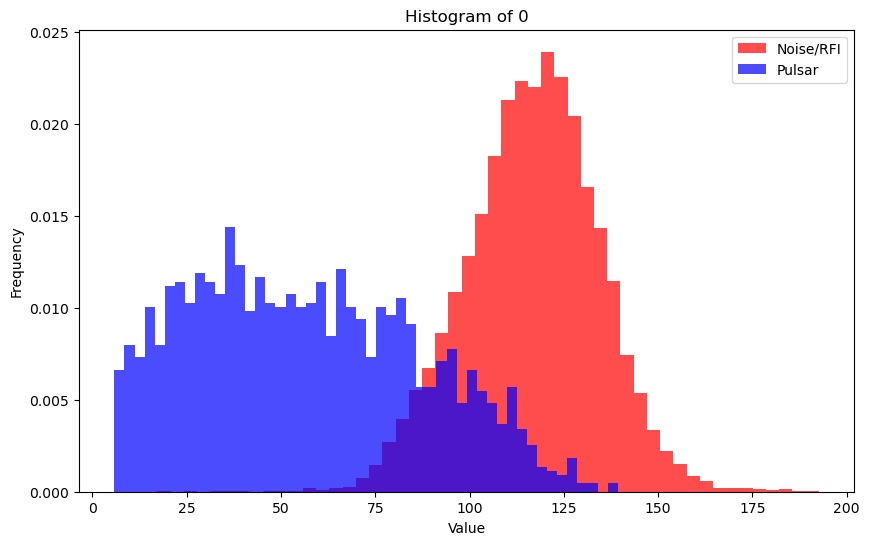

0        55.683782
1        58.882430
2        39.341649
3        57.178449
4        40.672225
           ...    
17893    59.847421
17894    49.485605
17895    59.935939
17896    53.902400
17897    85.797340
Name: 1, Length: 16259, dtype: float64


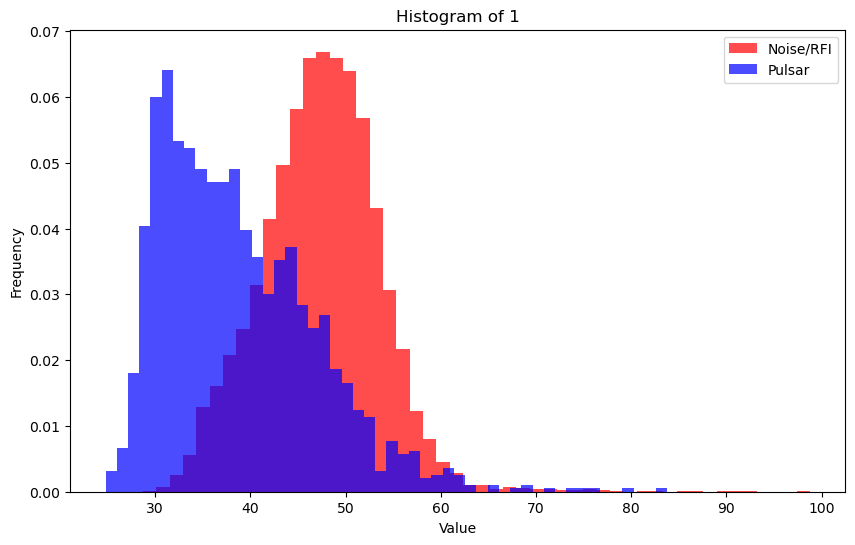

0       -0.234571
1        0.465318
2        0.323328
3       -0.068415
4        0.600866
           ...   
17893   -0.187846
17894    0.127978
17895    0.159363
17896    0.201161
17897    1.406391
Name: 2, Length: 16259, dtype: float64


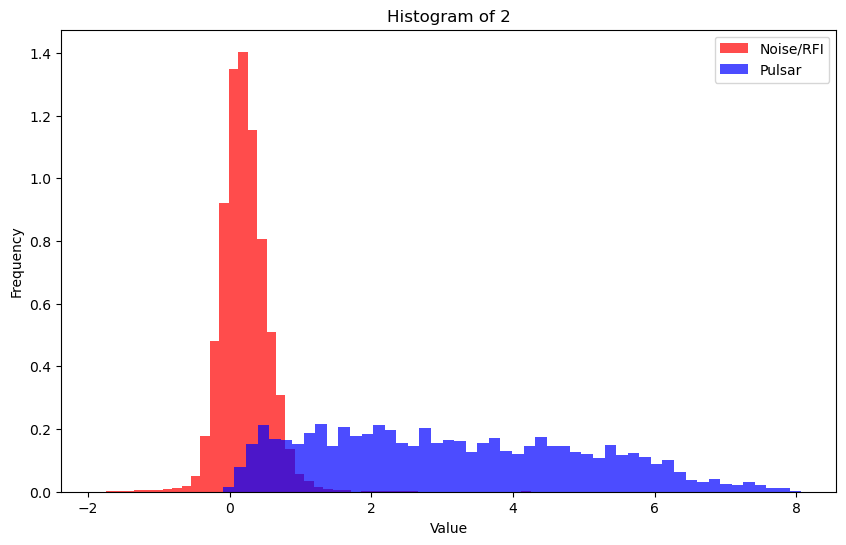

0       -0.699648
1       -0.515088
2        1.051164
3       -0.636238
4        1.123492
           ...   
17893   -0.738123
17894    0.323061
17895   -0.743025
17896   -0.024789
17897    0.089520
Name: 3, Length: 16259, dtype: float64


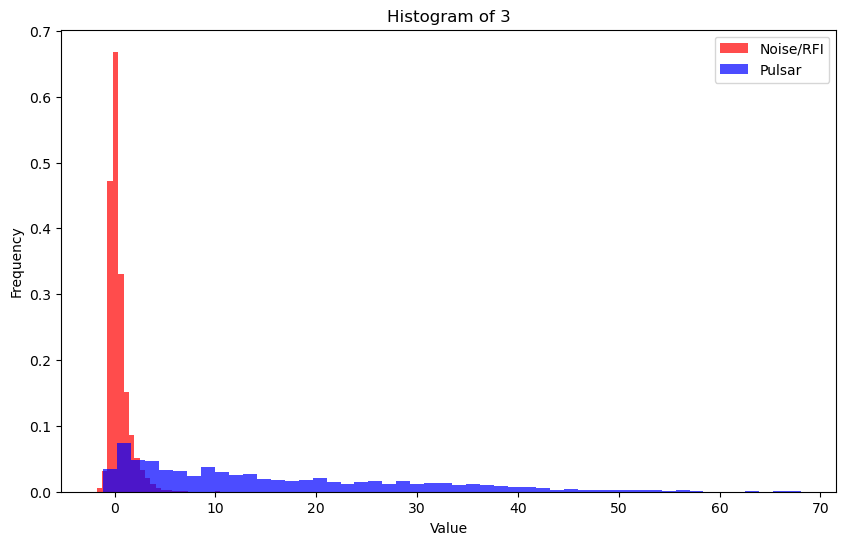

In [12]:
# Create histograms for the first 4 features (integrated pulse profile features)
# TODO: Loop through the first 4 columns of the dataset

# Your code here:

# iterate through the first 4 features/columns in the dataset
for i, feature_name in enumerate(df.columns[:4]):
    noise_feature = noise_data[feature_name]
    pulsar_feature = pulsar_data[feature_name]
    
    print(noise_feature)
    
    # creating the figures for each of the chsoen noise and pulsar features and differentiate them by color
    fig, ax  = plt.subplots(figsize=(10,6))
    # Noise in read, Pulsar in blue
    ax.hist(noise_feature, bins=50, label= 'Noise/RFI', color ='red', alpha = 0.7, density=True)
    ax.hist(pulsar_feature, bins=50,label='Pulsar', color = 'blue', alpha = 0.7, density=True)
    ax.set_title(f"Histogram of {feature_name}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    ax.legend()
    plt.show()
    
    

## Step 4: Probability Calculations

**Objective:** Calculate basic probabilities and apply Bayes' theorem.

**Define Events:**
- **Event A:** An observation is a pulsar candidate (class = 1)
- **Event B:** Mean of the integrated profile < 80

**Calculate the following probabilities:**
1. P(A) - Probability that a randomly chosen observation is a real pulsar
2. P(B) - Probability that mean of integrated profile < 80
3. P(A ∩ B) - Probability that both conditions are satisfied

**TODO:** Calculate the three basic probabilities

In [13]:
# Calculate P(A): Probability that an observation is a pulsar candidate
# TODO: Calculate the ratio of class 1 samples to total samples

# Calculate P(B): Probability that mean of integrated profile < 80
# TODO: Count how many samples have the first feature < 80

# Calculate P(A ∩ B): Probability that both conditions are satisfied
# TODO: Count samples that are both class 1 AND have first feature < 80

# Your code here:

# Ratio of real puslar samples to total samples
pulsar_probability = len(pulsar_data) / len(df)
print("P(A) = ", pulsar_probability)

# Probability that the mean is less than 80
count_less_than_80 = len(df[df.iloc[:, 0] < 80])
prob_less_than_80 = count_less_than_80 / len(df)

print("P(B) = ", prob_less_than_80)

# Probability that both of the above conditions are true
prob_both_conditions =  len(pulsar_data[pulsar_data.iloc[:,0] < 80])/ len(df)

print("P( A n B) = ", prob_both_conditions)


P(A) =  0.09157447759526204
P(B) =  0.08626662196893507
P( A n B) =  0.06900212314225053


## Step 5: Conditional Probabilities (Bayes' Theorem)

**Objective:** Calculate conditional probabilities using Bayes' theorem.

**Bayes' Theorem Formula:**
$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

**Calculate:**
1. **P(A|B)**: Given that mean of integrated profile < 80, what's the probability it's a real pulsar?
2. **P(B|A)**: Given that it's a real pulsar, what's the probability that mean < 80?

**TODO:** Apply Bayes' theorem to calculate conditional probabilities

In [14]:

# TODO: Calculate P(A|B) = P(A ∩ B) / P(B)
# This answers: "Given mean < 80, what's the probability it's a real pulsar?"

# TODO: Calculate P(B|A) = P(A ∩ B) / P(A) 
# This answers: "Given it's a real pulsar, what's the probability that mean < 80?"

# Your code here:
# Calculate probability of A given B
conditional_prob_A_given_B = prob_both_conditions / prob_less_than_80
print('P(A | B) = P(A ∩ B) / P(B) = ', conditional_prob_A_given_B)

# Calculate probability of B given A 
conditional_prob_B_given_A = prob_both_conditions / pulsar_probability
print('P(B | A) = P(A n B) / P(A)', conditional_prob_B_given_A)


P(A | B) = P(A ∩ B) / P(B) =  0.7998704663212436
P(B | A) = P(A n B) / P(A) 0.7535082367297132


## Step 6: Standard Normal Distribution Analysis

**Objective:** Understand different types of probabilities for the standard normal distribution.

**Background:** 
The standard normal distribution (Z) has mean = 0 and standard deviation = 1. 
For any Z-score, we can calculate:
1. **Cumulative probability (CDF)**: P(Z ≤ z) - probability below z
2. **Cumulative from mean**: P(0 ≤ Z ≤ z) - probability between mean and z  
3. **Complementary cumulative**: P(Z > z) - probability above z

**Formula:** If X ~ N(μ, σ²), then Z = (X - μ)/σ

**TODO:** Calculate probabilities for different Z-values

In [15]:
# Calculate different types of probabilities for Z-values
# TODO: Import norm from scipy.stats if not already imported
# TODO: Create an empty list to store results
# TODO: Loop through each Z value and calculate:
    # TODO: Append results to list
# TODO: Print results in a formatted way

# Your code here:
from scipy.stats import norm
#List of Z values to use
Z_values = [1, 3, 5]
# Empty List to store results
results = []
# Loop through Z values and find probabilities
for Z in Z_values:
    CDF = norm.cdf(Z)
    cumulative_prob_from_mean = CDF - 0.5
    complementary_CDF = 1 - CDF
    results.append((Z, CDF, cumulative_prob_from_mean, complementary_CDF))
    
# Display the results of the CDF, CDF from mean, and complementary CDF
for Z, CDF, cumulative_prob_from_mean, complementary_CDF in results:
    print(f"Z = {Z}:")
    print(f"Cumulative Probability (CDF) = {CDF}")
    print(f"Cumulative Probability from Mean = {cumulative_prob_from_mean}")
    print(f"Complementary Cumulative Probability (1 - CDF) = {complementary_CDF}\n")
    


Z = 1:
Cumulative Probability (CDF) = 0.8413447460685429
Cumulative Probability from Mean = 0.3413447460685429
Complementary Cumulative Probability (1 - CDF) = 0.15865525393145707

Z = 3:
Cumulative Probability (CDF) = 0.9986501019683699
Cumulative Probability from Mean = 0.4986501019683699
Complementary Cumulative Probability (1 - CDF) = 0.0013498980316301035

Z = 5:
Cumulative Probability (CDF) = 0.9999997133484281
Cumulative Probability from Mean = 0.4999997133484281
Complementary Cumulative Probability (1 - CDF) = 2.866515719235352e-07



## Step 7: Bonus - p-value Calculation

**Challenge:** Calculate the p-value for Z = 5.9

**p-value definition:** The probability of obtaining a result at least as extreme as the observed result, assuming the null hypothesis is true. For a Z-score, this is typically P(Z > |z|) for a two-tailed test or P(Z > z) for a one-tailed test.

In [16]:
# TODO: Calculate the CDF for Z = 5.9


# Your code here:

# Set our CDF as 5.9  and calculate the p-value
X = 5.9
p_val = 1 - norm.cdf(X)
print("p-value (CDF for Z=5.9):", p_val)

p-value (CDF for Z=5.9): 1.8175078109194942e-09


## Summary and Reflection Questions

**After completing this lab, you should be able to:**
1. Load and manipulate datasets using pandas
2. Create comparative histograms for data analysis
3. Calculate basic and conditional probabilities
4. Apply Bayes' theorem to real-world problems
5. Understand different types of probabilities in normal distributions

**Discussion Questions:**
1. Which features show the clearest separation between noise and real pulsars?
2. What does the conditional probability P(A|B) tell us about the relationship between pulsar classification and the mean integrated profile?
3. How do the three types of Z-score probabilities relate to different research questions?
4. What would you conclude about the practical significance of a Z-score of 5.9?

**Next Steps:**
- Commit your completed notebook to your GitHub repository
- Compare your results with your lab partner
- Prepare to discuss your findings in the next class

1. I believe the profile skewness and kurtosis
2. When the mean integrated profile is less than 80 there is a high chance there is a real pulsar
3. Cumalative probability is that a stat is below Z, cumalative probability from mean is a stat being from mean to Z, Complementary probability is that a stat is above Z
4. At Z-score of 5.9 was the Z-score of the discovery of the Higgs Boson
